# Capstone Exploratory Data Analysis

This notebook contains the steps done to perform an exploratory data analysis (EDA) to develop an initial report. The dataset used here is the CDC Diabetes Health Indicators dataset from UC Irvine Machine Learning Repository. The UC Irvine Machine Learning Repository points to a [dataset home page](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) from kaggle. The raw data comes from the Behavioral Risk Factor Surveilance System from CDC. We will use the CSV from kaggle to perform the exploratory data analysis

## Specifying the imports

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

### General Settings

In [2]:
# Set display options 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## Reading the Data

In [3]:
# Load BRFS csv into a dataframe
df = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.shape

(253680, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Checking Data Quality

In [6]:
numeric_features = ["BMI","MentHlth","PhysHlth"]
bin_clinical_features = ["HighBP","HighChol","CholCheck","Stroke","HeartDiseaseorAttack","DiffWalk","Sex"]
bin_lifestyle_features = ["Smoker","PhysActivity","Fruits","Veggies","HvyAlcoholConsump"]
ordinal_lifestyle_features = ["Education","Income","Age","GenHlth"]

In [7]:
# Check for missing values
# Find columns with na count more than 0
df.isna().sum()[df.isna().sum() >0]

Series([], dtype: int64)

In [8]:
# Check if binary clinical features have out of range values 
invalid_counts = {}

for column in bin_clinical_features:
    invalid_counts[column] = (~df[column].isin([0, 1])).sum()

invalid_df = pd.Series(invalid_counts).rename("invalid_count")
invalid_df[invalid_df > 0]


Series([], Name: invalid_count, dtype: int64)

In [9]:
# Check if ordinal lifestyle features have out of range values 
invalid_counts = {}
valid_ranges={'Education':[1,2,3,4,5,6],
              'Income':[1,2,3,4,5,6,7,8],
              'Age':[1,2,3,4,5,6,7,8,9,10,11,12,13],
              'GenHlth':[1,2,3,4,5]}

for column in ordinal_lifestyle_features:
    invalid_counts[column] = (~df[column].isin(valid_ranges[column])).sum()

invalid_df = pd.Series(invalid_counts).rename("invalid_count")
invalid_df[invalid_df > 0]

Series([], Name: invalid_count, dtype: int64)

In [10]:
# Check if binary lifestyle features have out of range values 
invalid_counts = {}

for column in bin_lifestyle_features:
    invalid_counts[column] = (~df[column].isin([0, 1])).sum()

invalid_df = pd.Series(invalid_counts).rename("invalid_count")
invalid_df[invalid_df > 0]

Series([], Name: invalid_count, dtype: int64)

In [11]:
# Check for duplicate values 
dup_count = df.duplicated().sum()
print ("number of duplicate rows",dup_count)

number of duplicate rows 23899


In [12]:
# Remove the duplicates 
df =df.drop_duplicates()
df.shape

(229781, 22)

## Visualizing the data

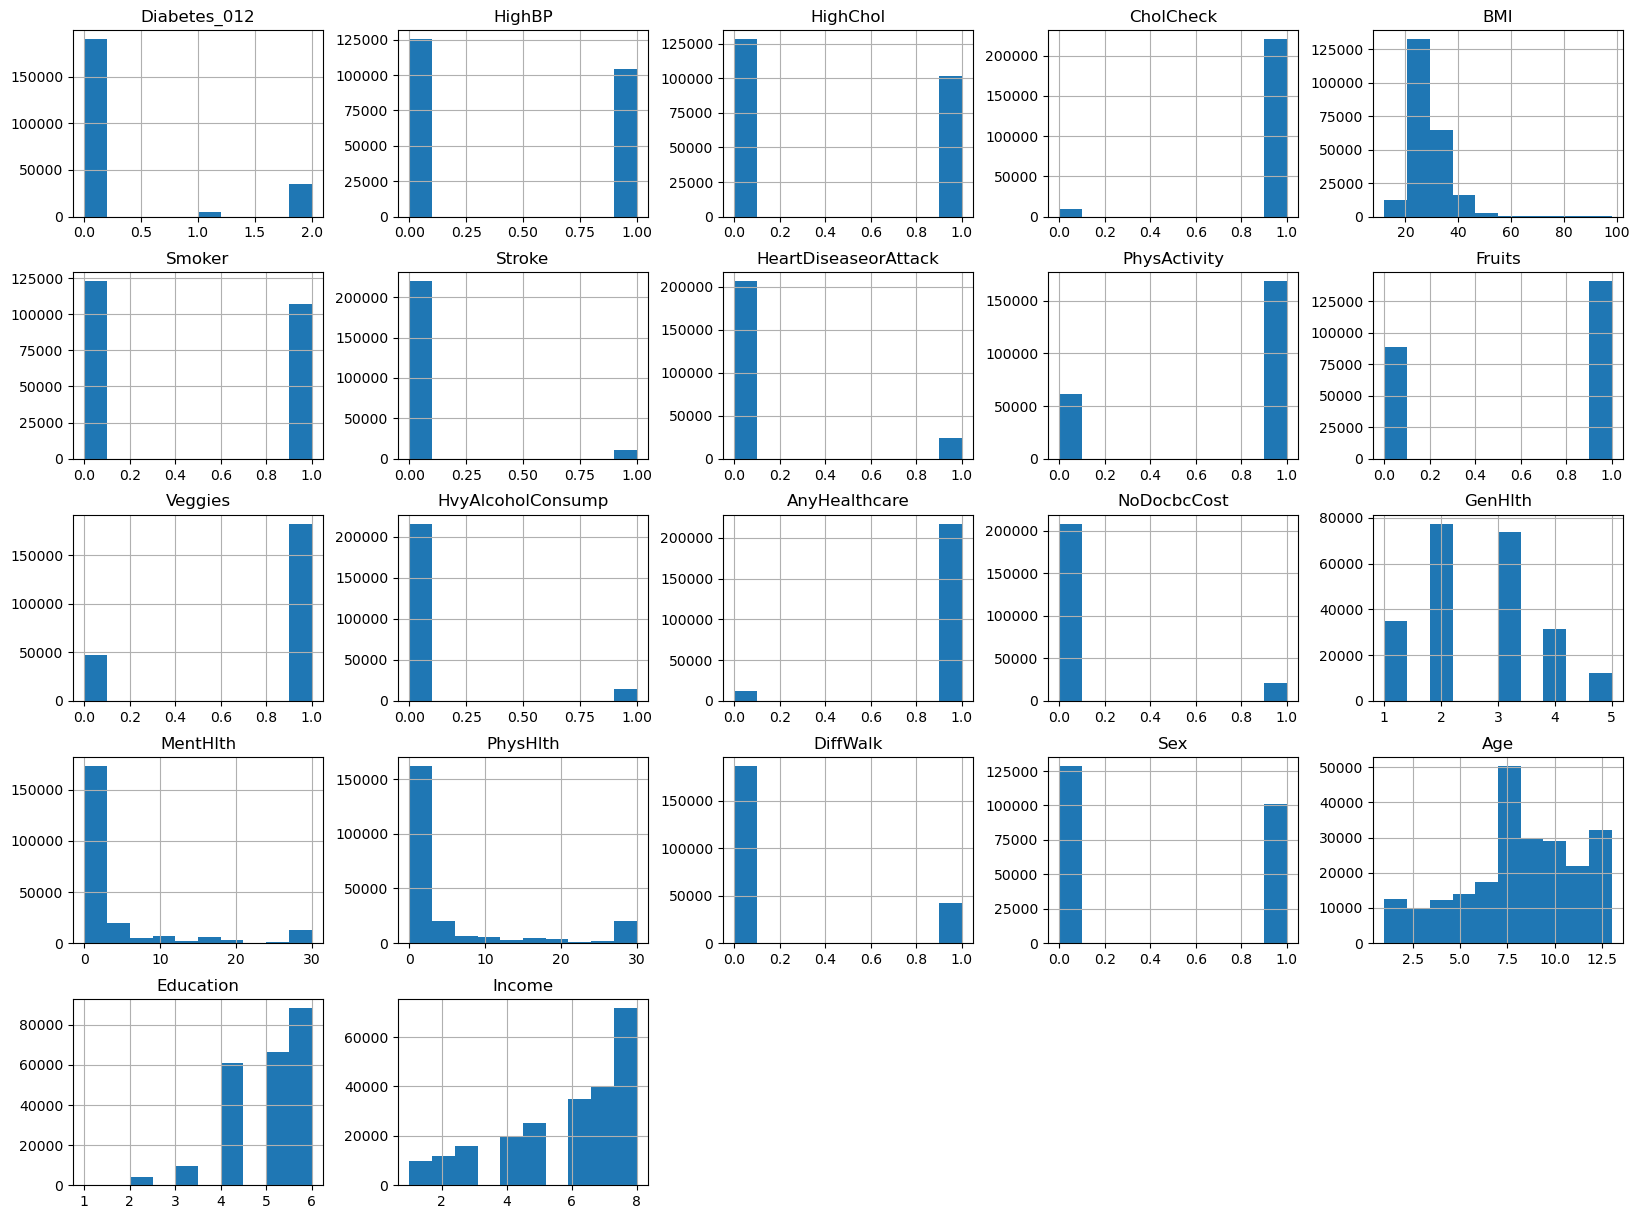

In [13]:
# Plot a histogram of features 
df.hist(figsize=(20,15));
plt.savefig("images/histograms.png", dpi =300)
plt.show()

Diabetes_012
0.0    190055
1.0      4629
2.0     35097
Name: count, dtype: int64


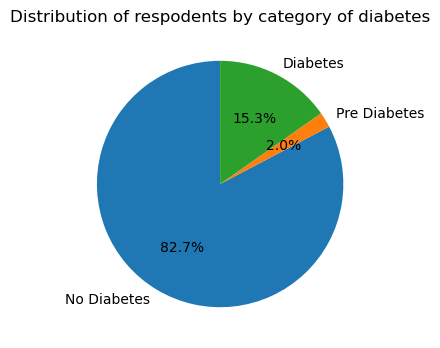

In [14]:
# Pie plot showing distribution of respodents by target column
# 0 --> No Diabetes
# 1 --> Pre Diabetes
# 2 --> Diabetes
value_counts = df['Diabetes_012'].value_counts().sort_index()
print(value_counts)

plt.figure(figsize=(4,4))
plt.title("Distribution of respodents by category of diabetes")
plt.pie(value_counts, labels =["No Diabetes", "Pre Diabetes",  "Diabetes"], autopct="%1.1f%%",startangle=90)
plt.savefig("images/diabetes_distribution.png", dpi =300,bbox_inches="tight")
plt.show()

In [15]:
# Corelation between target column and other columns 
df.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,0.170816,-0.103408,-0.025462,-0.043446,-0.067164,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,-0.107742,-0.147102
HighBP,0.261976,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.201271,-0.104131,-0.019329,-0.042853,-0.014218,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,-0.112676,-0.139782
HighChol,0.203327,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.176279,-0.063266,-0.026125,-0.027254,-0.019104,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,-0.049838,-0.061871
CholCheck,0.075701,0.111220,0.094753,1.000000,0.042420,-0.003776,0.027894,0.049995,-0.004409,0.017973,-0.000537,-0.021043,0.115539,-0.054198,0.062782,-0.001549,0.040612,0.048969,-0.024255,0.095996,-0.009758,0.002161
BMI,0.212027,0.194126,0.089615,0.042420,1.000000,-0.009196,0.011062,0.039926,-0.127864,-0.067528,-0.044185,-0.058334,-0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,-0.049347,-0.074568,-0.069192
Smoker,0.046774,0.074237,0.074627,-0.003776,-0.009196,1.000000,0.054438,0.105154,-0.066981,-0.061947,-0.013892,0.096052,-0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,-0.135793,-0.095418
Stroke,0.100276,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.198863,-0.059440,-0.004613,-0.033141,-0.021272,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,-0.064319,-0.117232
HeartDiseaseorAttack,0.170816,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,1.000000,-0.073267,-0.007128,-0.027330,-0.035453,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,-0.082466,-0.122908
PhysActivity,-0.103408,-0.104131,-0.063266,-0.004409,-0.127864,-0.066981,-0.059440,-0.073267,1.000000,0.125283,0.135478,0.023190,0.024095,-0.046620,-0.237676,-0.106175,-0.199562,-0.235943,0.033586,-0.087539,0.171224,0.166171
Fruits,-0.025462,-0.019329,-0.026125,0.017973,-0.067528,-0.061947,-0.004613,-0.007128,0.125283,1.000000,0.243114,-0.028357,0.022756,-0.032521,-0.071433,-0.052409,-0.024744,-0.030188,-0.088628,0.073726,0.085174,0.051230


In [16]:
# 0 --> No Diabetes
# 1 --> Pre Diabetes
# 2 --> Diabetes
diabetes_labels = {0: 'No Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'}

#Create a new target variable to show presence of diabetes
df['Diabetes Prevalent'] = (df['Diabetes_012'] == 2).astype(int)
plot_df = df.copy()
plot_df['Diabetes Category'] = plot_df['Diabetes_012'].map(diabetes_labels)

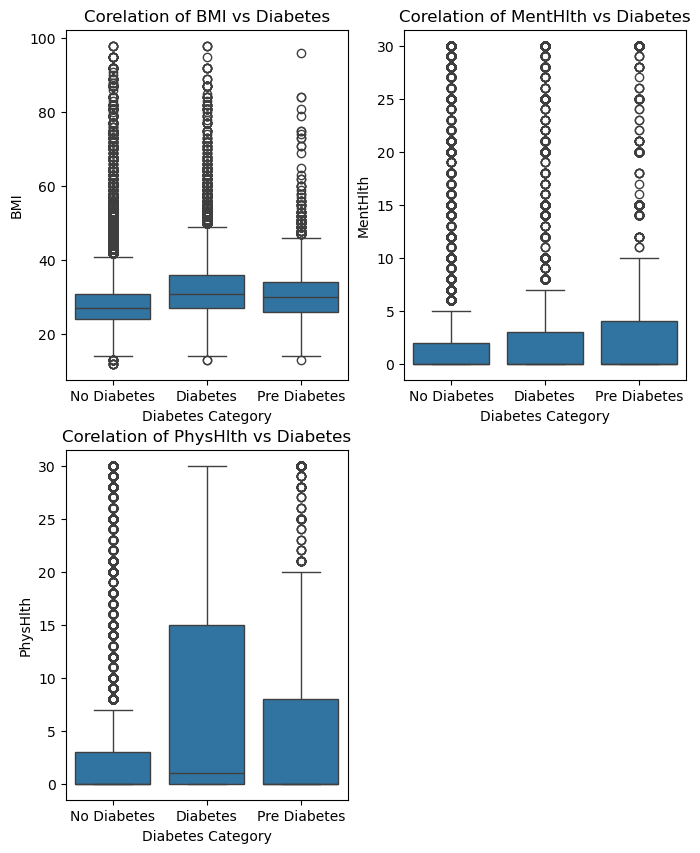

In [17]:
# We will create a combined box plot of numeric features using subplots 
fig, axes = plt.subplots(2,2,figsize=(8,10))
axes = axes.flatten()

for axis,column in zip(axes,numeric_features):
    sns.boxplot(data=plot_df, x='Diabetes Category', y=column,ax=axis)
    axis.set_title(f"Corelation of {column} vs Diabetes")
for axis in axes[len(numeric_features):]:
    axis.remove()
    
plt.savefig("images/numeric_boxplots.png", dpi =300)
plt.show()

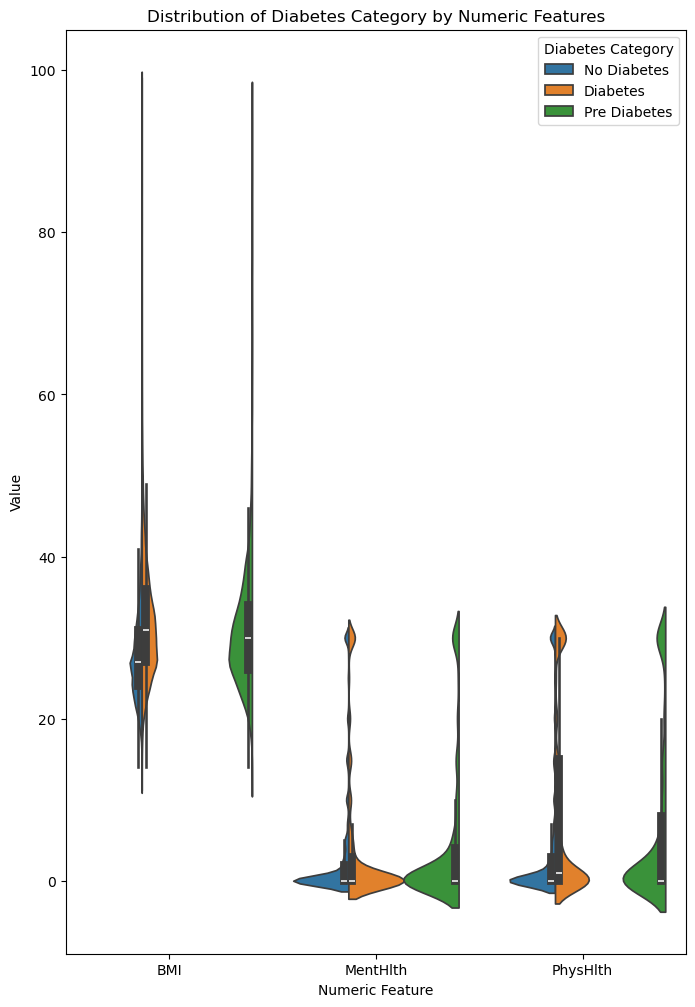

In [18]:
# We will create a combined violin plot of the numeric features 

melted_df = plot_df.melt(id_vars='Diabetes Category', var_name='Numeric Feature', value_name='Value', value_vars= numeric_features)
plt.figure(figsize=(8,12))
plt.title("Distribution of Diabetes Category by Numeric Features")
sns.violinplot(data=melted_df,x='Numeric Feature', y='Value', hue="Diabetes Category", split=True)
plt.savefig("images/numeric_violinplots.png", dpi =300)
plt.show()

In [19]:
# We will do a IQR analysis to visualize outliers 
outliers=[]
for column in numeric_features:
    Q1= df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR =Q3-Q1 
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 +1.5 * IQR
    outlier = ((df[column] < lower_bound) | (df[column] > upper_bound)).mean()
    outliers.append({
        'Feature': column,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'outlier': outlier
    })
iqr_df = pd.DataFrame(outliers).sort_values('outlier', ascending=False)
iqr_df   

,Feature,IQR,Lower Bound,Upper Bound,outlier
1,MentHlth,2.0,-3.0,5.0,0.157380
2,PhysHlth,4.0,-6.0,10.0,0.149477
0,BMI,8.0,12.0,44.0,0.024536


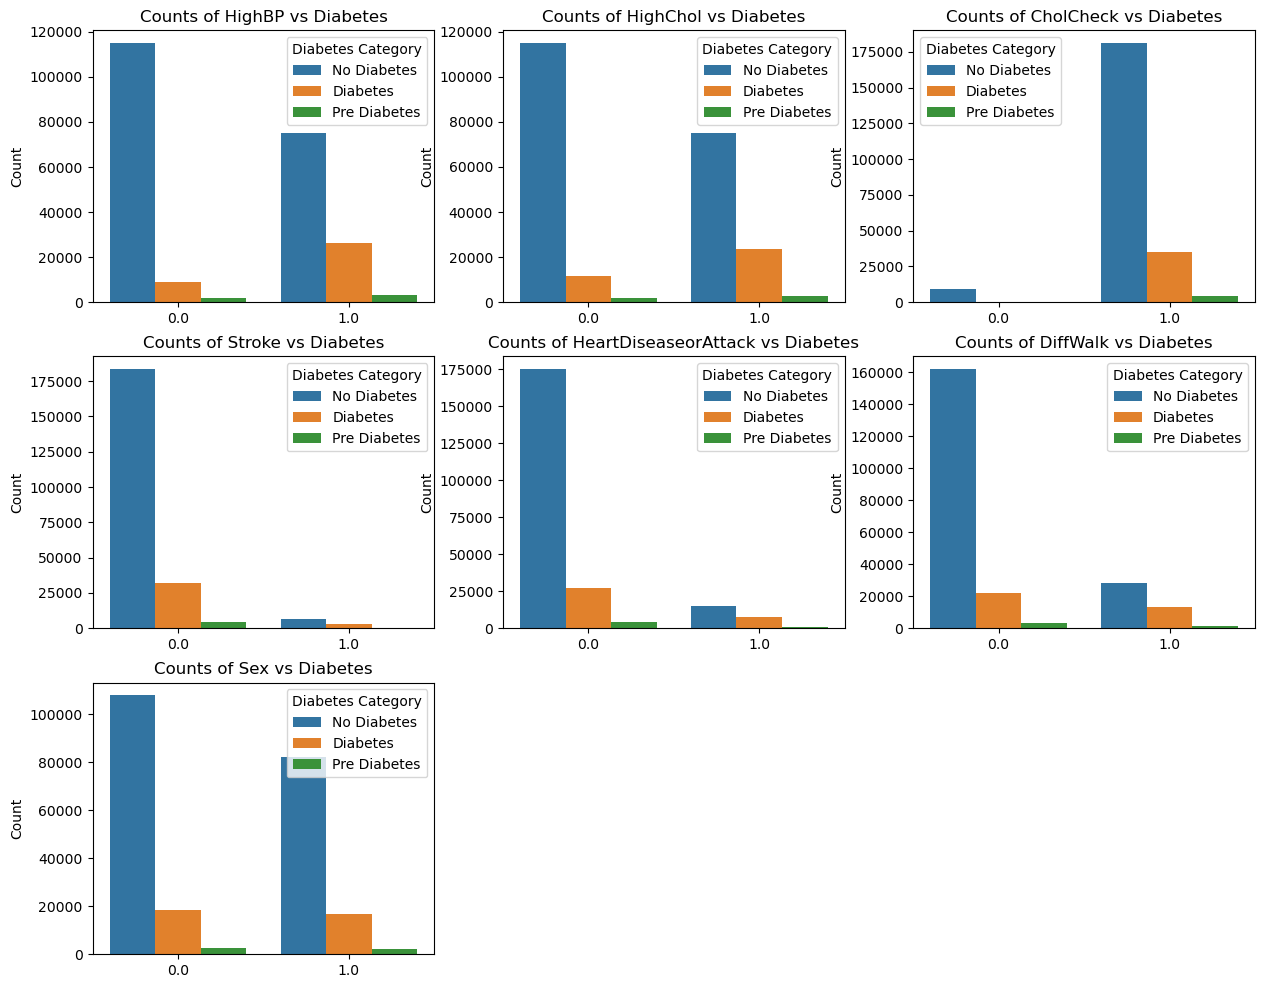

In [20]:
# We will create a combined countplot for clinical binary features
fig, axes = plt.subplots(3,3,figsize=(15,12))
axes = axes.flatten()

for axis,column in zip(axes,bin_clinical_features):
    sns.countplot(data=plot_df, hue='Diabetes Category',ax=axis, x= column)
    axis.set_title(f"Counts of {column} vs Diabetes")
    axis.set_xlabel('')
    axis.set_ylabel('Count')

for axis in axes[len(bin_clinical_features):]:
    axis.remove()
    
plt.savefig("images/clinical_countplot.png", dpi =300)
plt.show()


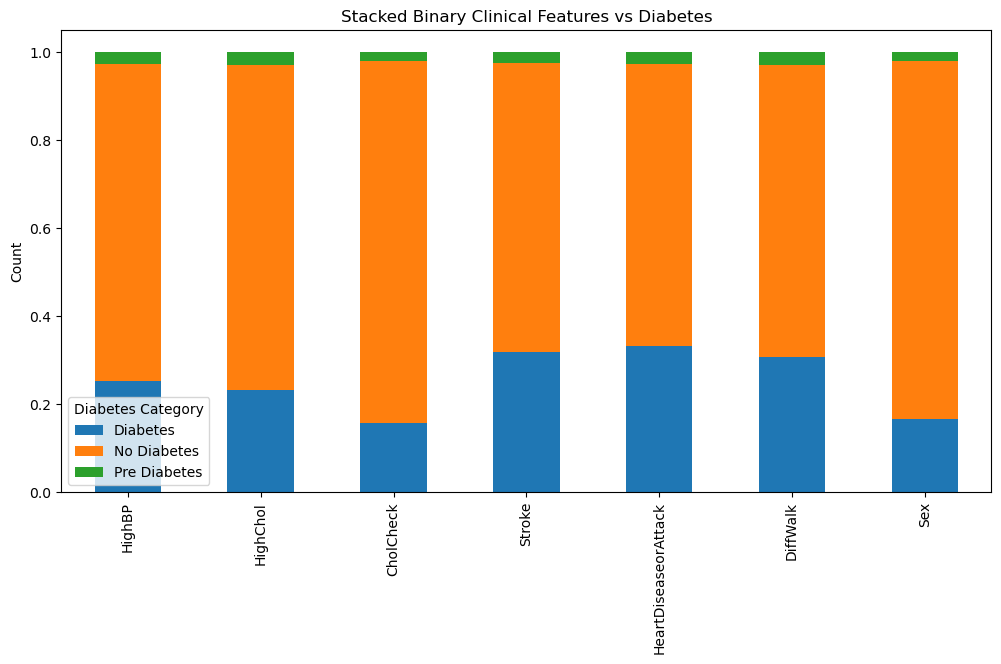

In [21]:
# We will create a stacked bar chart with proportions for binary Clinical features 
stacked_list=[]
for feature in bin_clinical_features:
    # Crosstab for each binary feature
    ct = pd.crosstab(
        plot_df[feature],
        plot_df['Diabetes Category'],
        normalize='index'
    )
    
    # Keep only "feature = 1" row (presence of condition)
    ct = ct.loc[1]
    ct.name = feature
    stacked_list.append(ct)
stacked_data = pd.DataFrame(stacked_list)    
stacked_data.plot(stacked=True, kind='bar', figsize=(12,6))
plt.title("Stacked Binary Clinical Features vs Diabetes")
plt.ylabel("Count")
plt.legend(title="Diabetes Category")
plt.savefig("images/clinical_stackplot.png", dpi =300)
plt.show()

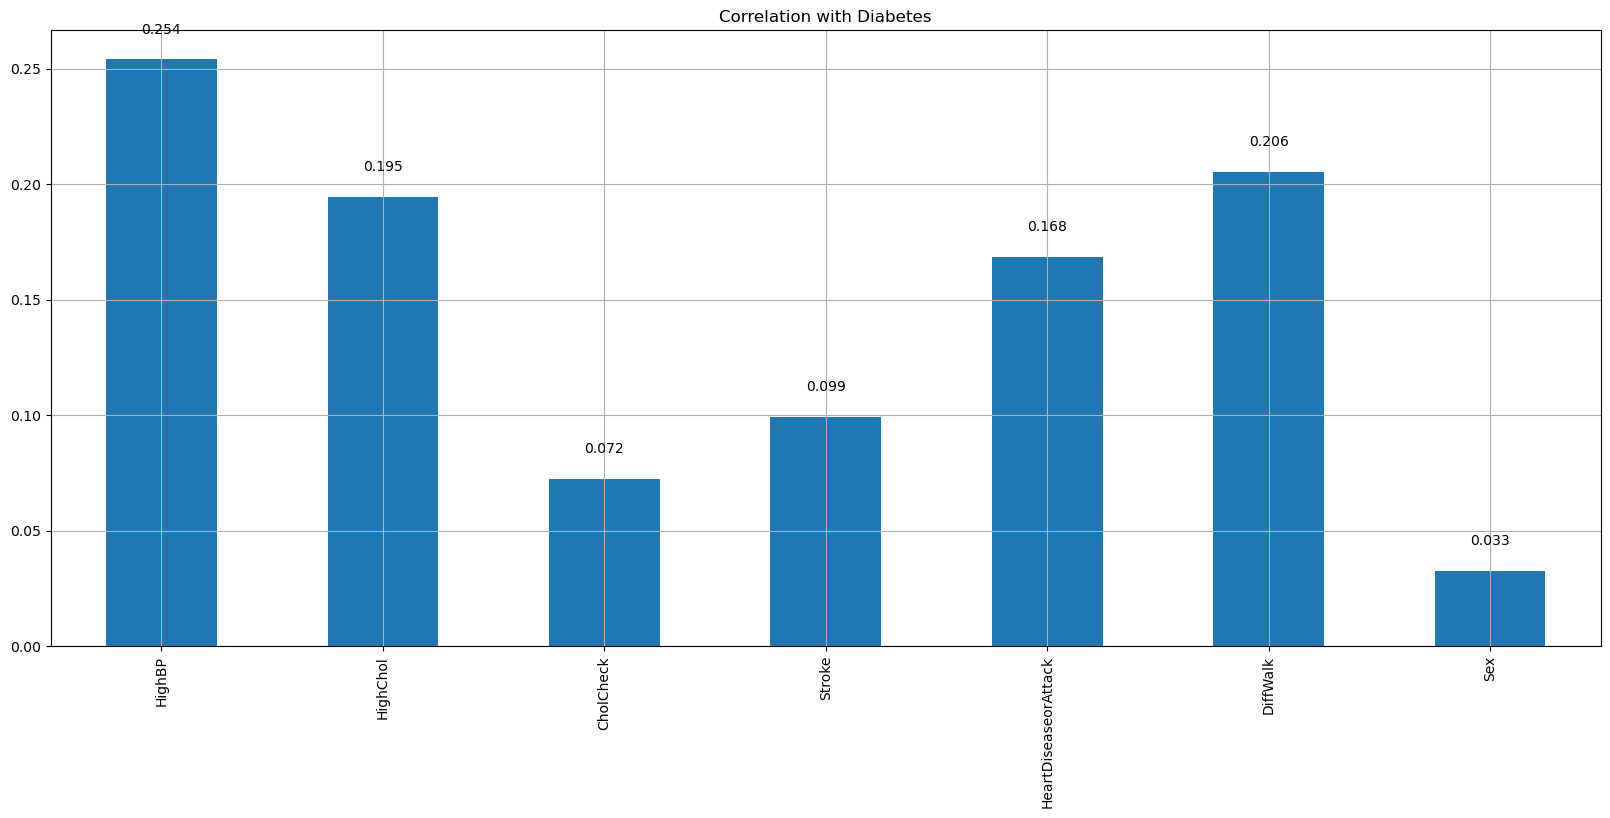

In [22]:
# Co-relation of clinical categorial features
corelations=df.drop('Diabetes_012', axis=1)[bin_clinical_features].corrwith(df['Diabetes Prevalent'])
ax=corelations.plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes")
for i, (idx, val) in enumerate(corelations.items()):
    ax.text(i, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontsize=10)
plt.savefig("images/clinical_corelation.png", dpi =300)
plt.show()

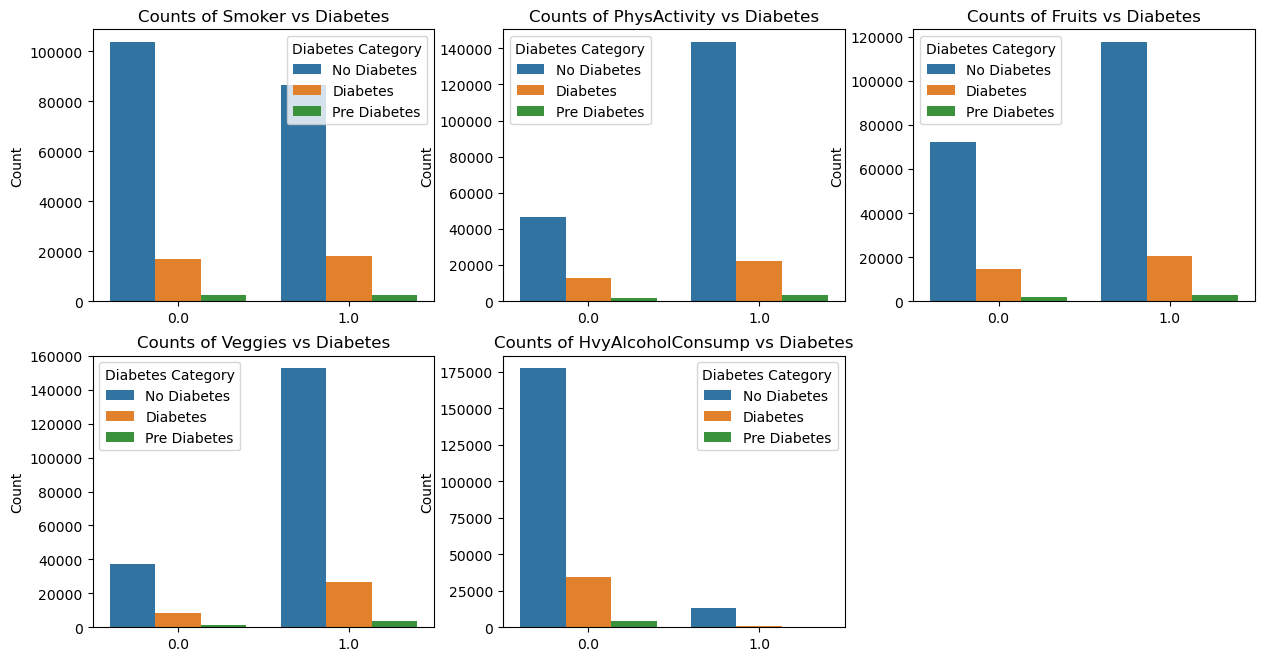

In [23]:
# We will create a combined countplot for lifestyle binary features

fig, axes = plt.subplots(3,3,figsize=(15,12))
axes = axes.flatten()

for axis,column in zip(axes,bin_lifestyle_features):
    sns.countplot(data=plot_df, hue='Diabetes Category',ax=axis, x= column)
    axis.set_title(f"Counts of {column} vs Diabetes")
    axis.set_xlabel('')
    axis.set_ylabel('Count')

for axis in axes[len(bin_lifestyle_features):]:
    axis.remove()
    
plt.savefig("images/lifestyle_countplot.png", dpi =300)
plt.show()

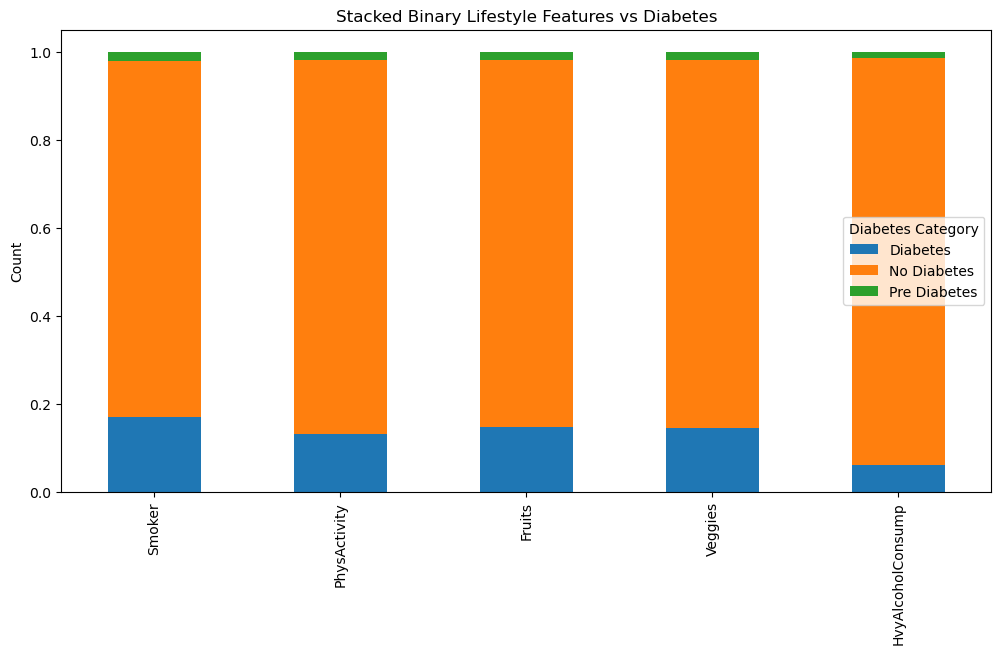

In [24]:
# We will create a stacked bar chart with proportions for binary lifestyle features 
stacked_list=[]
for feature in bin_lifestyle_features:
    # Crosstab for each binary feature
    ct = pd.crosstab(
        plot_df[feature],
        plot_df['Diabetes Category'],
        normalize='index'
    )
    
    # Keep only "feature = 1" row (presence of condition)
    ct = ct.loc[1]
    ct.name = feature
    stacked_list.append(ct)
stacked_data = pd.DataFrame(stacked_list)    
stacked_data.plot(stacked=True, kind='bar', figsize=(12,6))
plt.title("Stacked Binary Lifestyle Features vs Diabetes")
plt.ylabel("Count")
plt.legend(title="Diabetes Category")
plt.savefig("images/lifestyle_stackplot.png", dpi =300)
plt.show()

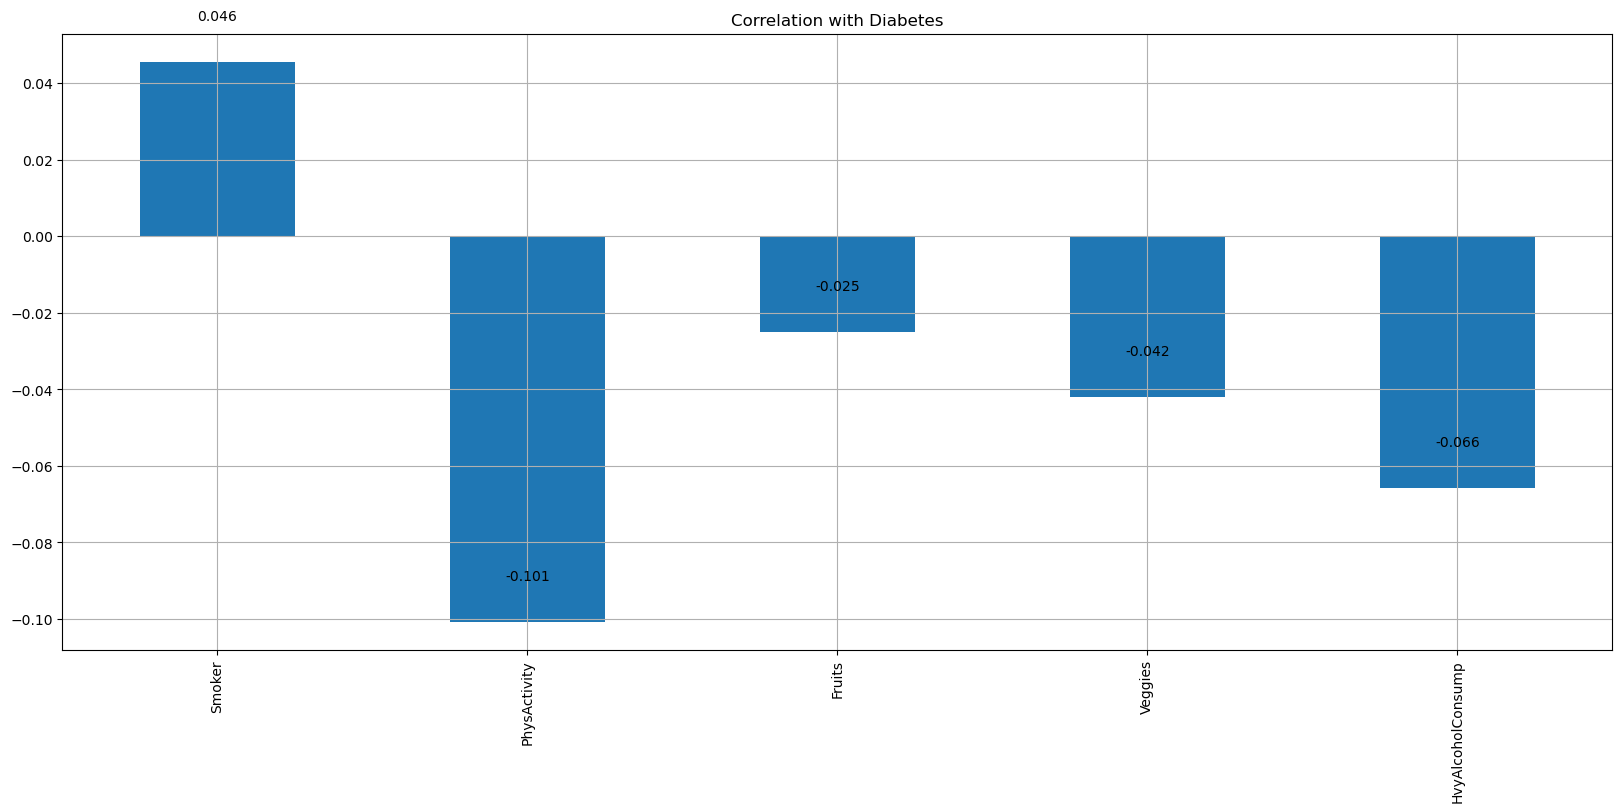

In [25]:
# Co-relation of lifestyle categorial features
corelations=df.drop('Diabetes_012', axis=1)[bin_lifestyle_features].corrwith(df['Diabetes Prevalent'])
ax=corelations.plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes")
for i, (idx, val) in enumerate(corelations.items()):
    ax.text(i, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontsize=10)
plt.savefig("images/lifestyle_corelation.png", dpi =300)
plt.show()

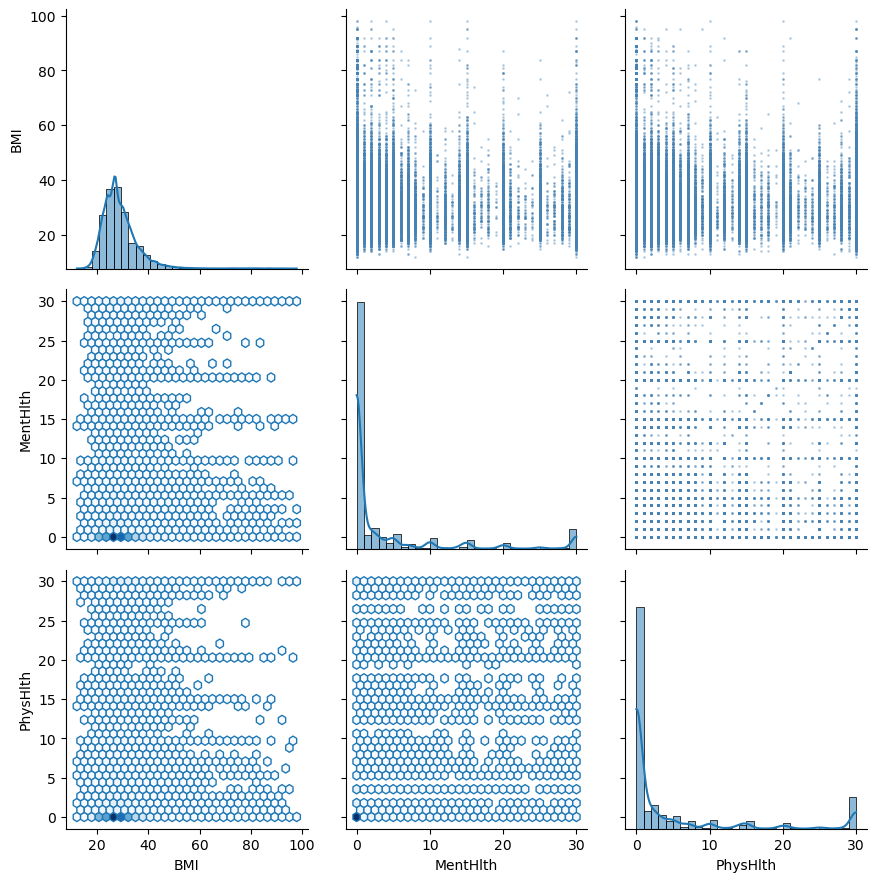

In [26]:
# Hexbin matrix for numeric features 
grid = sns.PairGrid(plot_df[numeric_features],height=3, aspect=1)
grid.map_lower(plt.hexbin, gridsize=30, cmap='Blues', mincnt=1)
grid.map_diag(sns.histplot, kde=True, bins=30)
grid.map_upper(plt.scatter, alpha=0.3, s=1, color='steelblue')
plt.savefig("images/numeric_hexbin.png", dpi =300)
plt.show()

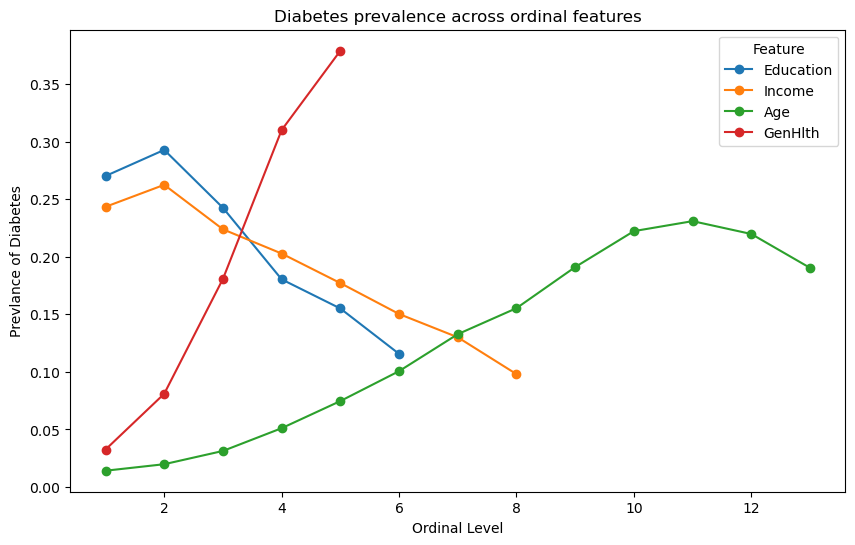

In [27]:
# Combined Line plot of all Ordinal categorical features
plt.figure(figsize=(10,6))
for column in ordinal_lifestyle_features:
    prev_rate = df.groupby(column)['Diabetes Prevalent'].mean()
    plt.plot(prev_rate.index,prev_rate.values, marker='o',label = column)
plt.title("Diabetes prevalence across ordinal features")
plt.legend(title='Feature')
plt.xlabel('Ordinal Level')
plt.ylabel('Prevlance of Diabetes')
plt.savefig("images/categorical_lineplot.png", dpi =300)
plt.show()  



## Modeling the data

In [28]:
# Combine all features for baseline modeling
baseline_features = numeric_features + bin_clinical_features + bin_lifestyle_features + ordinal_lifestyle_features 

# Prepare the data
X = df[baseline_features]
y = df['Diabetes Prevalent']

### Train/Test Split

In [33]:
# Split with 20% test size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Create a pre-processor with a RobustScaler for numerical columns
# and a passthrough for all lifestyle features 
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), numeric_features),
    ('pass', 'passthrough', bin_clinical_features + bin_lifestyle_features + ordinal_lifestyle_features)
])

## Baseline Model

In [35]:
baseline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
baseline_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('pass', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'DiffWalk', 'Sex', 'Smoker',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'Education', 'Income', 'Age',
                                                   'GenHlth'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

## Scoring the Model

In [36]:
# We will score the model for accuracy, precision, ROC-AUC and F1 scores

y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy Score: {accuracy:.3f}")
print(f"Precision Score: {precision:.3f}")
print(f"Recall Score: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")


Accuracy Score: 0.851
Precision Score: 0.544
Recall Score: 0.152
F1-score: 0.238
ROC-AUC: 0.811


**As seen from the distribution Pie chart, the total occurence of diabetes is only 15.3% of the overall dataset. This shows heavily imbalanced data and therefore skews the Accuracy and Precision scores. We will discard the Accuracy and Precision scores** 

**Recall is also very low 0.152 again due to imblanced class problem**